# Bike-Sharing System

# Data Understanding:

In [4]:
# Importing necessary Python libraries for data input and understanding
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

raw_data = pd.read_csv('day.csv')
raw_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [84]:
raw_data.shape

(730, 16)

In [85]:
raw_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [86]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### The object is to model the demand for shared bikes with available independent variables. Management will use this for understand how exactly the demands vary with different features. 

#### Seems there is no missing values in the data set.
#### Except one column (dteday) all are values are in Integer and Float
#### For this data-set we have 3 types of columns:
1) Categorical: season, mnth, weekday etc.    
2) Continous/Numerical: windspeed, hum, atemp, count etc.    
3) Binary: yr, holiday, workingday.

# Step 1: Data Cleaning and Manipulation:

In [5]:
# Dropping unnecessary columns like: 'instant', 'dteday', 'casual' and 'registered'
# Removing 'casual, and 'registered' as 'cnt' is our target variable and casual+registered=cnt 
raw_data.drop(['instant', 'dteday', 'registered', 'casual'], axis=1, inplace=True)
raw_data.shape

(730, 12)

In [6]:
# Renaming some columns for better understanding
raw_data.rename(columns= {'yr': 'year', 'mnth': 'month', 'hum': 'humidity', 'cnt': 'count'}, inplace=True)
raw_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
# Mapping the categorical columns season as it's category.
# Mapping variables season, month, weekday and weathersit
raw_data.season = raw_data.season.map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
raw_data.month = raw_data.month.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
raw_data.weekday = raw_data.weekday.map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})
raw_data.weathersit = raw_data.weathersit.map({1:'Clear', 2:'Mist Cloudy', 3:'Snow and Rainy'})

In [8]:
# Copying/Storing the data into new Data-Frame
bikes = raw_data.copy()
bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,Spring,0,Jan,0,Sat,0,Mist Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Mist Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Step 2: Data Visualization

## Performing EDA:

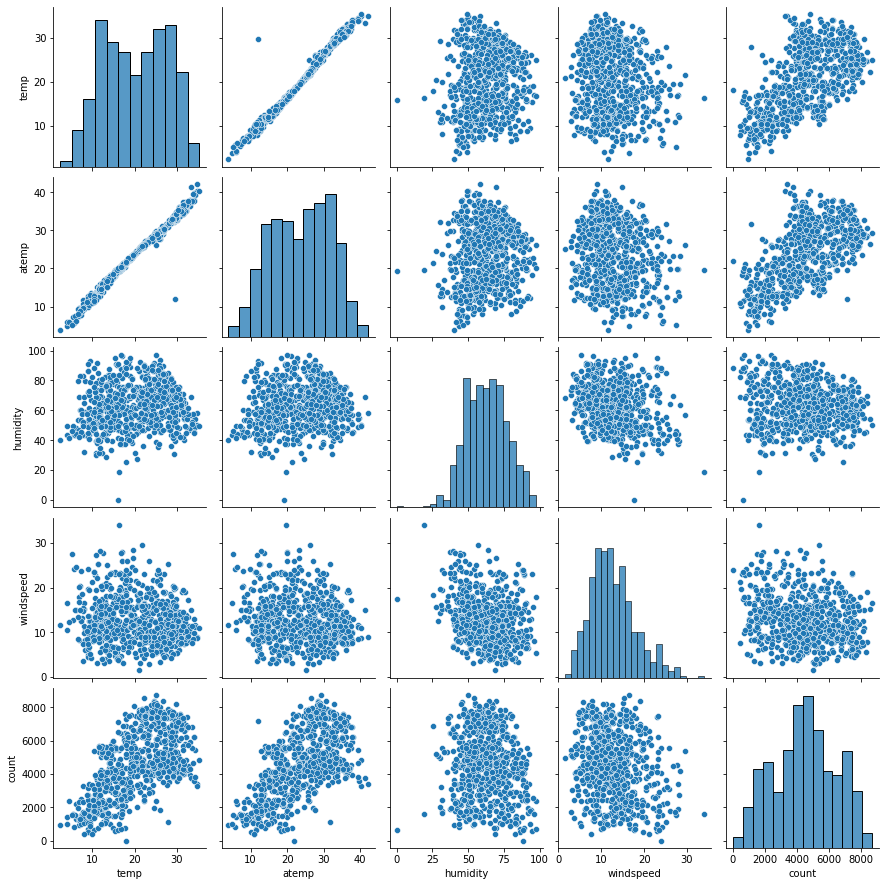

In [10]:
# Pairplot for Numeric Variables
sns.pairplot(bikes, vars=['temp', 'atemp', 'humidity', 'windspeed', 'count'])
plt.show()

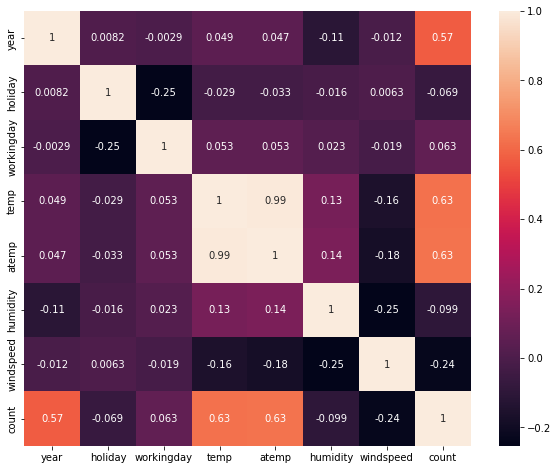

In [92]:
# Checking the correlation between variables
plt.figure(figsize= (10,8))
sns.heatmap(bikes.corr(), annot=True)
plt.show()

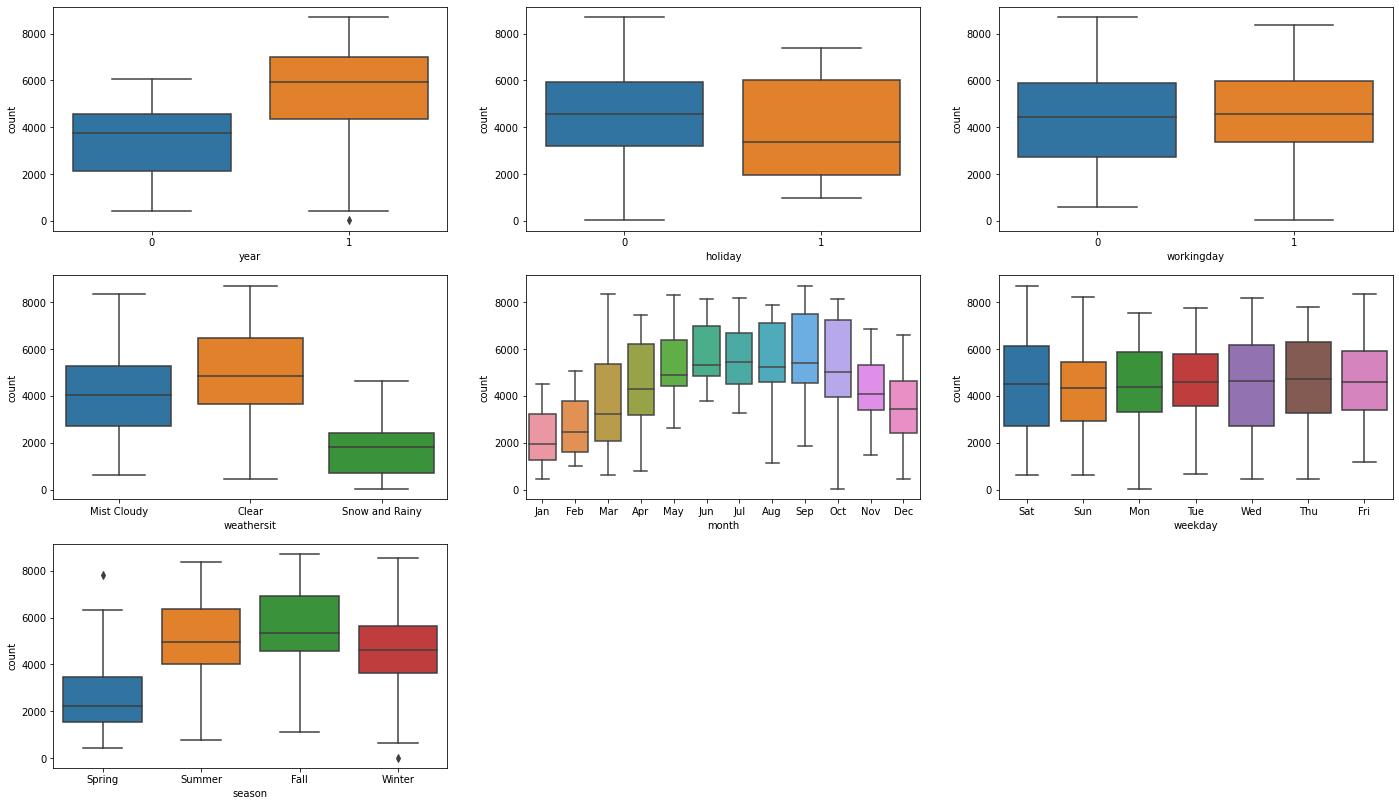

In [9]:
# Visualizing categorical Variables to understand data better
plt.figure(figsize=(24, 14))

plt.subplot(3,3,1)
sns.boxplot(x = 'year', y = 'count', data=bikes)

plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'count', data=bikes)

plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'count', data=bikes)

plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'count', data=bikes)

plt.subplot(3,3,5)
sns.boxplot(x = 'month', y = 'count', data=bikes)

plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'count', data=bikes)

plt.subplot(3,3,7)
sns.boxplot(x = 'season', y = 'count', data=bikes)

plt.show()

<AxesSubplot:xlabel='season', ylabel='count'>

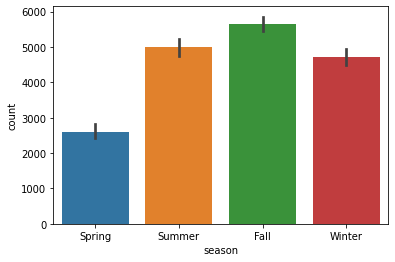

In [94]:
# Relationship between Season and Count of Bike rentals
sns.barplot('season','count', data=bikes, palette="tab10")

<AxesSubplot:xlabel='weathersit', ylabel='count'>

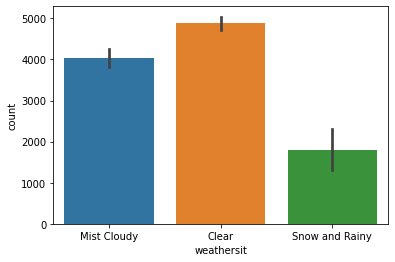

In [95]:
# Relationship between weathersit and count of Bike rentals
sns.barplot('weathersit','count', data=bikes, palette="tab10")

<AxesSubplot:xlabel='year', ylabel='count'>

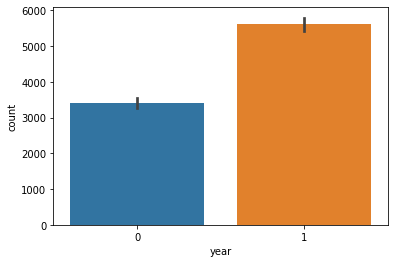

In [96]:
# Relationship between year and count of Bike rentals
sns.barplot('year','count', data=bikes, palette="tab10")

<AxesSubplot:xlabel='weekday', ylabel='count'>

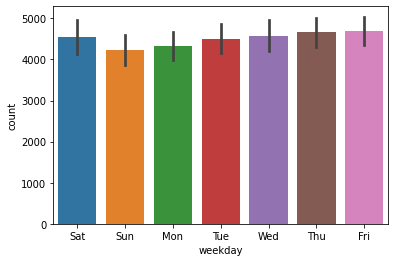

In [97]:
# Relationship between weekday and count of Bike rentals
sns.barplot('weekday','count', data=bikes, palette="tab10")

<AxesSubplot:xlabel='month', ylabel='count'>

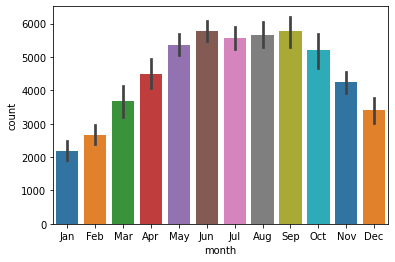

In [98]:
# Relationship between months and count of Bike rentals
sns.barplot('month','count', data=bikes, palette="tab10")

### Insights/highlights from above plots:

#### Pair-plot shows shows there is a Linear Relationship between 'temp' and 'atemp'.
#### As Bike-Rental Count shows a Positive Corelation between 'temp' and 'atemp' so bike rental counts increase at Higher temp and vice-versa
#### Both of the parameters can't be used in the model due to Multicollinearity.
#### Most of the bookings has been done during months of June, July, August and September
#### Clear weather also have more bookings

# Step 3: Data Preparation

#### Create dummy variables for all the categorical variables:

In [99]:
# Dummy variables for season, month, weekday and weathersit
season_bikes = pd.get_dummies(bikes.season, drop_first=True)
month_bikes = pd.get_dummies(bikes.month, drop_first=True)
weekday_bikes = pd.get_dummies(bikes.weekday, drop_first=True)
weathersit_bikes = pd.get_dummies(bikes.weathersit, drop_first=True)

In [100]:
# Merge the results from above to orignal data-frame
bikes = pd.concat([bikes,season_bikes,month_bikes,weekday_bikes,weathersit_bikes], axis=1)
bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Mist Cloudy,Snow and Rainy
0,Spring,0,Jan,0,Sat,0,Mist Cloudy,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,1,0
1,Spring,0,Jan,0,Sun,0,Mist Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,1,0
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [101]:
# Dropping the Categorical variables as they are already dummy encoded
bikes.drop(['season','month','weekday','weathersit'], axis=1, inplace=True)
bikes.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Mist Cloudy,Snow and Rainy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [102]:
bikes.shape

(730, 30)

#### Dividing the data into Train and Test sets:

In [103]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
bikes_train, bikes_test = train_test_split(bikes, train_size=0.7, random_state=100)

In [104]:
bikes_train.shape

(510, 30)

In [105]:
bikes_test.shape

(220, 30)

#### Performing Scaling:

##### It is important to have all variables in same scale.
##### Can use Standardization and Normalization so that all the units of the coefficients are on same scale. 

##### 2 common ways of scaling are:
1) Min-Max Scaling (Normalization): Between 0 and 1

2) Standardization: mean-0, sigma-1

In [106]:
# Using MinMaxScaler for rescalings the feature
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [107]:
# Apply Scaler on all the Numeric variables
num_vars = ['temp','atemp','humidity','windspeed','count']
bikes_train[num_vars] = scaler.fit_transform(bikes_train[num_vars])
bikes_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Mist Cloudy,Snow and Rainy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,1,0


#### Dividing data into Dependent and Independent variable

In [108]:
# Dividing into X and Y sets for model building
y_train = bikes_train.pop('count')
X_train = bikes_train

In [109]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: count, dtype: float64

In [110]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Mist Cloudy,Snow and Rainy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,1,0


# Step 4: Data Modeling and Evaluation

#### Create Linear Regression Model:

##### RFE (Recursive Feature Elimination) for automated feature selection: 

In [111]:
# Import RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [112]:
# Running RFE with output number of 15 variables
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [113]:
rfe = RFE(lm, step=15)
rfe = rfe.fit(X_train, y_train)

In [114]:
# List the selected 15 variables
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Spring', False, 2),
 ('Summer', False, 2),
 ('Winter', True, 1),
 ('Aug', False, 2),
 ('Dec', False, 2),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', False, 2),
 ('Jun', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Nov', False, 2),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Mon', False, 2),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 2),
 ('Tue', False, 2),
 ('Wed', False, 2),
 ('Mist Cloudy', True, 1),
 ('Snow and Rainy', True, 1)]

In [115]:
# Variables where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'Winter', 'Jan', 'Sep', 'Sat', 'Sun', 'Mist Cloudy',
       'Snow and Rainy'],
      dtype='object')

In [116]:
# Variables where RFE support is False
X_train.columns[~rfe.support_]

Index(['Spring', 'Summer', 'Aug', 'Dec', 'Feb', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Mon', 'Thu', 'Tue', 'Wed'],
      dtype='object')

##### Building model using STATS MODEL
###### Model 1

In [117]:
# Creating X_test dataframe where with RFE selected variables
X_train_rfe = X_train[col]

In [118]:
# Adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [119]:
# Running the Linear Model
lm1 = sm.OLS(y_train, X_train_rfe).fit()

In [120]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     179.0
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          9.40e-178
Time:                        13:24:22   Log-Likelihood:                 482.37
No. Observations:                 510   AIC:                            -936.7
Df Residuals:                     496   BIC:                            -877.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1821      0.024      7.

###### Only atemp and holiday seems higher p-value more then 0.05 which is 0.434 and 0.247

In [121]:
# Removing the atemp and holiday
X_train_new = X_train_rfe.drop(['atemp', 'holiday'], axis=1)

#### Checking VIF (Variance Inflation Factor)

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a Data-frame for store all the feature variables and their VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
0,const,87.37
2,workingday,9.06
9,Sat,6.05
10,Sun,5.73
4,humidity,1.87
3,temp,1.71
11,Mist Cloudy,1.56
7,Jan,1.44
6,Winter,1.30
12,Snow and Rainy,1.24


##### Results shows the VIF value for const is very high so we can drop the const

In [123]:
# Dropping the const variable
X_train_new = X_train_new.drop(['const'], axis=1)

##### Model 2: Rebuilding the model without the const

In [124]:
# Calculating VIF for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
3,humidity,26.65
1,workingday,15.91
2,temp,10.81
8,Sat,4.33
4,windspeed,4.28
9,Sun,4.23
10,Mist Cloudy,2.21
0,year,2.07
5,Winter,1.68
6,Jan,1.49


In [125]:
#Adding a const variable
X_train_lm2 = sm.add_constant(X_train_new)

#Running the Linear Model
lm2 = sm.OLS(y_train, X_train_lm2).fit()

In [126]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     194.0
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          8.95e-179
Time:                        13:26:28   Log-Likelihood:                 482.05
No. Observations:                 510   AIC:                            -938.1
Df Residuals:                     497   BIC:                            -883.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1572      0.039      3.

##### Removing humidity due to high VIF value

In [127]:
# Removing the humidity variable
X_train_new = X_train_new.drop(['humidity'], axis=1)

##### Model 3: Rebuilding the model

In [128]:
# Calculating VIF for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
1,workingday,10.51
2,temp,8.48
3,windspeed,4.28
7,Sat,3.18
8,Sun,2.96
0,year,2.06
9,Mist Cloudy,1.57
4,Winter,1.48
5,Jan,1.40
6,Sep,1.16


In [129]:
#Adding a const variable
X_train_lm3 = sm.add_constant(X_train_new)

#Running the Linear Model
lm3 = sm.OLS(y_train, X_train_lm3).fit()

In [130]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     206.1
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          2.03e-177
Time:                        13:27:08   Log-Likelihood:                 476.06
No. Observations:                 510   AIC:                            -928.1
Df Residuals:                     498   BIC:                            -877.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0807      0.033      2.

##### Model 4: Rebuilding the model

In [131]:
# Removing the Sun variable due to high p-value
X_train_new = X_train_new.drop(['Sun'], axis=1)

In [132]:
# Calculating VIF for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
2,temp,4.99
1,workingday,4.24
3,windspeed,3.45
0,year,2.04
7,Sat,1.74
8,Mist Cloudy,1.54
4,Winter,1.31
5,Jan,1.24
6,Sep,1.15
9,Snow and Rainy,1.08


In [133]:
#Adding a const variable
X_train_lm4 = sm.add_constant(X_train_new)

#Running the Linear Model
lm4 = sm.OLS(y_train, X_train_lm4).fit()

In [181]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     224.8
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          1.12e-177
Time:                        23:29:58   Log-Likelihood:                 473.87
No. Observations:                 510   AIC:                            -925.7
Df Residuals:                     499   BIC:                            -879.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1317      0.022      5.

##### Model 5: Rebuilding the model

In [182]:
# Removing the workingday variable due to high VIF
X_train_new = X_train_new.drop(['workingday'], axis=1)

In [183]:
# Calculating VIF for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
1,temp,3.61
2,windspeed,3.18
0,year,2.03
7,Mist Cloudy,1.50
3,Winter,1.28
6,Sat,1.18
4,Jan,1.17
5,Sep,1.15
8,Snow and Rainy,1.08


In [185]:
#Adding a const variable
X_train_lm5 = sm.add_constant(X_train_new)

#Running the Linear Model
lm5 = sm.OLS(y_train, X_train_lm5).fit()

In [186]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     236.1
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          9.94e-174
Time:                        23:33:13   Log-Likelihood:                 461.71
No. Observations:                 510   AIC:                            -903.4
Df Residuals:                     500   BIC:                            -861.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1758      0.021      8.

### Vision/Highlights from above model:

* The last/final model seems to have very less multicollinearity between the predictors.
* The VIF and p-values also seems to be significiant.
* F-Statistics value of 236.1 (which is greater than 1).
* R-Square value is 0.809 or 80.9%
* Adjusted R-square is 0.806 or 80.6%

#### Checking variuos assumptions:

In [196]:
#Residual Analysis Of Training Data
y_train_pred = lm5.predict(X_train_lm5)

In [197]:
%matplotlib inline

Text(0.5, 0, 'Errors')

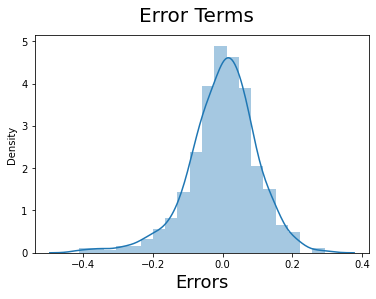

In [198]:
# Plot a histogram for error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins=20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize=18)

##### Above histogram shows, Residuals are normally distributed so our assumptions satifies our model

#### Making predections:

In [200]:
# Selecting the variables part of the Final Model
col1 = X_train_new.columns
X_test = X_test[col1]

In [201]:
# Adding constant variable for test dataframe
X_test_lm5 = sm.add_constant(X_test)
X_test_lm5.head()

,const,year,temp,windspeed,Winter,Jan,Sep,Sat,Mist Cloudy,Snow and Rainy
184,1.0,0,0.831783,0.084219,0,0,0,0,1,0
535,1.0,1,0.901354,0.153728,0,0,0,0,0,0
299,1.0,0,0.511964,0.334206,1,0,0,0,1,0
221,1.0,0,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,0.817246,0.537414,0,0,0,0,0,0


In [202]:
# Making Predection
y_pred = lm5.predict(X_test_lm5)

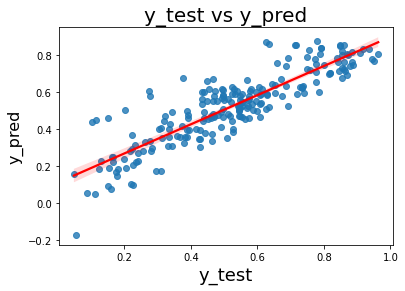

In [203]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
sns.regplot(x=y_test,y=y_pred,fit_reg=True,line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

#### Check the Adjusted R-Square for both train & Test data:

In [204]:
X_test_new = X_test[X_train_new.columns]
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.shape

(220, 10)

In [209]:
# Evaluate R-square from the test
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.7680440267046746

In [210]:
n = X_test_new1.shape[0]      # n is number of rows in X_test_new

p = X_test_new1.shape[1]     # p= Number of features/predictors which is number of columns in X_test_new

# Calculating Adjusted R-squared value using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7569456547766686

##### Compare the results on Train and Test datasets: 

- Train Data Set:
    * R-squared:          80.9%
    * Adj. R-squared:     80.6%
- Test Data Set:
    * R-squared:          76.8%
    * Adj. R-squared:     75.7%

###### Deference between R2 for Train and Test is 4.1% which is less then 5%. So we can say that it is the best model
###### Deference between Adjusted R2 for Train and Test is 4.9% which is less then 5%. So we can say that it is the best model
###### Temperature could be a prime factor for making decision
###### We can see that demand of bikes is more in 2019 compare to 2018